# **Electricity Consumption and Production Data**

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings('ignore')

In [58]:
url='Electricity.csv'
df=pd.read_csv(url,sep=',')
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [59]:
df.head().style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [60]:
df.isnull().sum()

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

In [61]:
print(df.shape)

(46011, 10)


In [62]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [63]:
df.describe().style.background_gradient(cmap='rainbow')

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,46011,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000
mean,2021-08-16 11:19:47.715981056,6587.616440,6518.645628,1291.177501,792.310882,1857.052444,1171.890418,1193.157332,156.688031,55.851862
min,2019-01-01 00:00:00,3889.000000,3315.000000,562.000000,-26.000000,175.000000,198.000000,279.000000,0.000000,17.000000
25%,2020-04-24 06:30:00,5773.000000,5814.000000,1347.000000,236.000000,1347.000000,858.000000,962.000000,0.000000,45.000000
50%,2021-08-16 12:00:00,6552.000000,6462.000000,1383.000000,592.000000,1747.000000,1211.000000,1172.000000,2.000000,57.000000
75%,2022-12-08 15:30:00,7321.000000,7176.000000,1405.000000,1205.000000,2265.000000,1511.000000,1406.000000,280.000000,67.000000
max,2024-03-31 23:00:00,9615.000000,9886.000000,1457.000000,2811.000000,4434.000000,2141.000000,2537.000000,1137.000000,89.000000
std,nan,1043.654923,986.805018,236.549637,675.812712,692.592157,434.748917,320.449368,229.502650,14.235554


In [64]:
print(f'Fecha Inicial {df['DateTime'].min()}')
print(f'Fecha Final {df['DateTime'].max()}')

Fecha Inicial 2019-01-01 00:00:00
Fecha Final 2024-03-31 23:00:00


In [65]:
df_new=df.copy()
df_new.set_index('DateTime',inplace=True)
df_new.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


## **EDA**

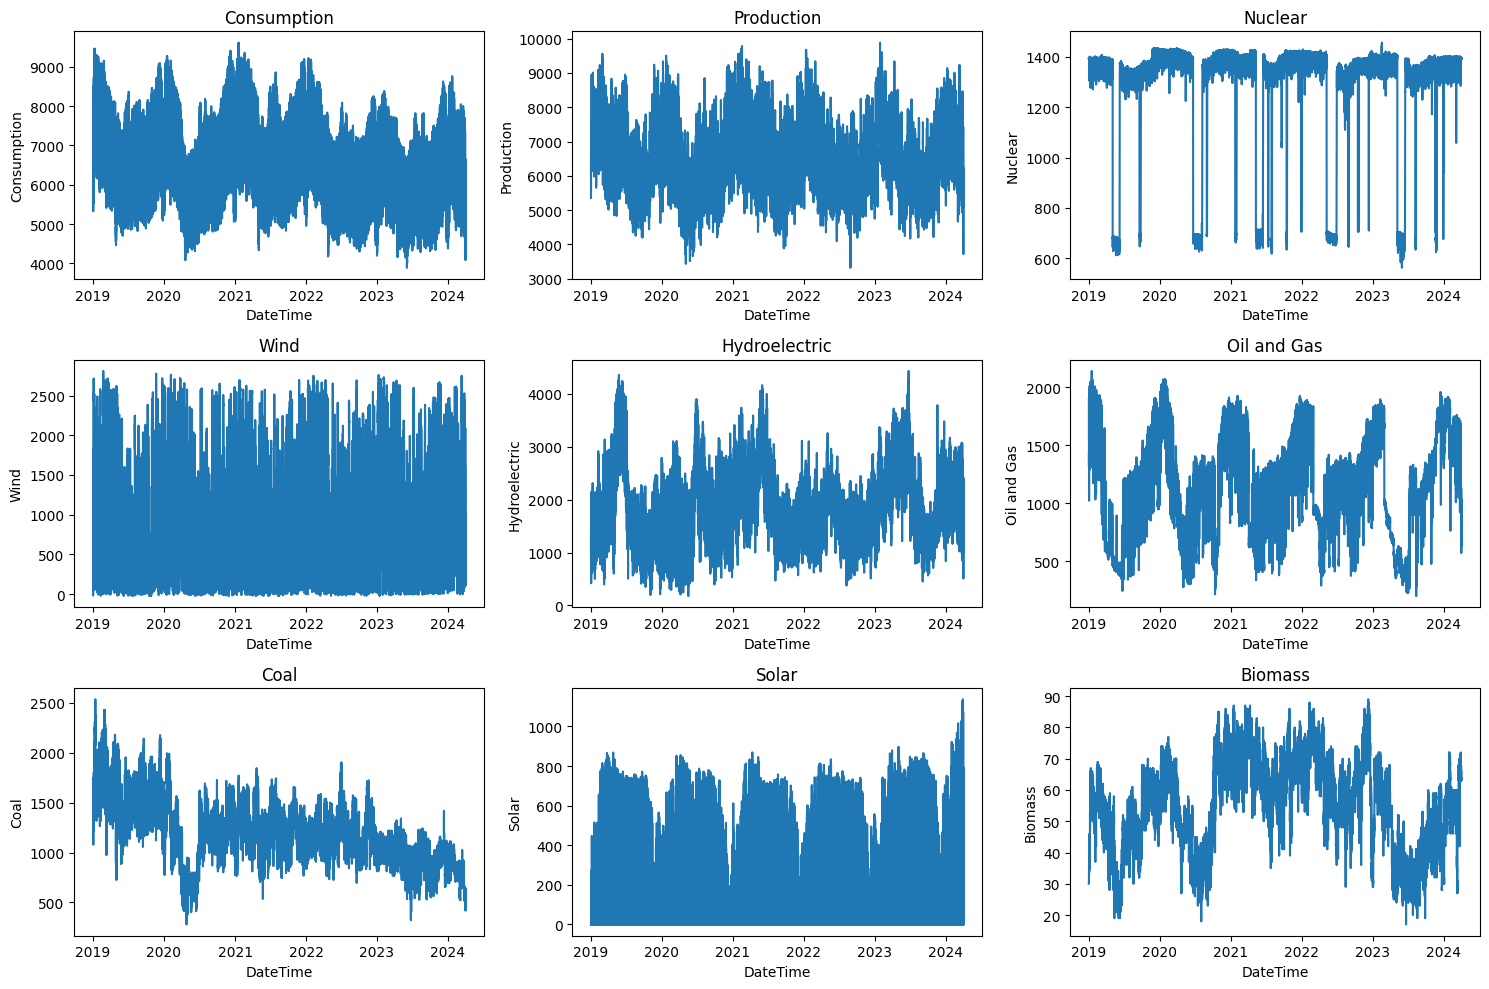

In [66]:
col_num=df_new.select_dtypes(include='number').columns
# Número de columnas y filas
n_rows = 3
n_cols = 3
# Crear una figura y una cuadrícula de subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()
# Iterar sobre las columnas y los ejes para dibujar cada gráfico
for i, ax in enumerate(axes):
    if i < len(col_num):
        sns.lineplot(data=df_new, x=df_new.index, y=col_num[i], ax=ax)
        ax.set_title(col_num[i])
    else:
        ax.set_visible(False)  # Ocultar los ejes no utilizados
# Ajustar el layout para evitar superposiciones
plt.tight_layout()
# Mostrar la figura
plt.show()

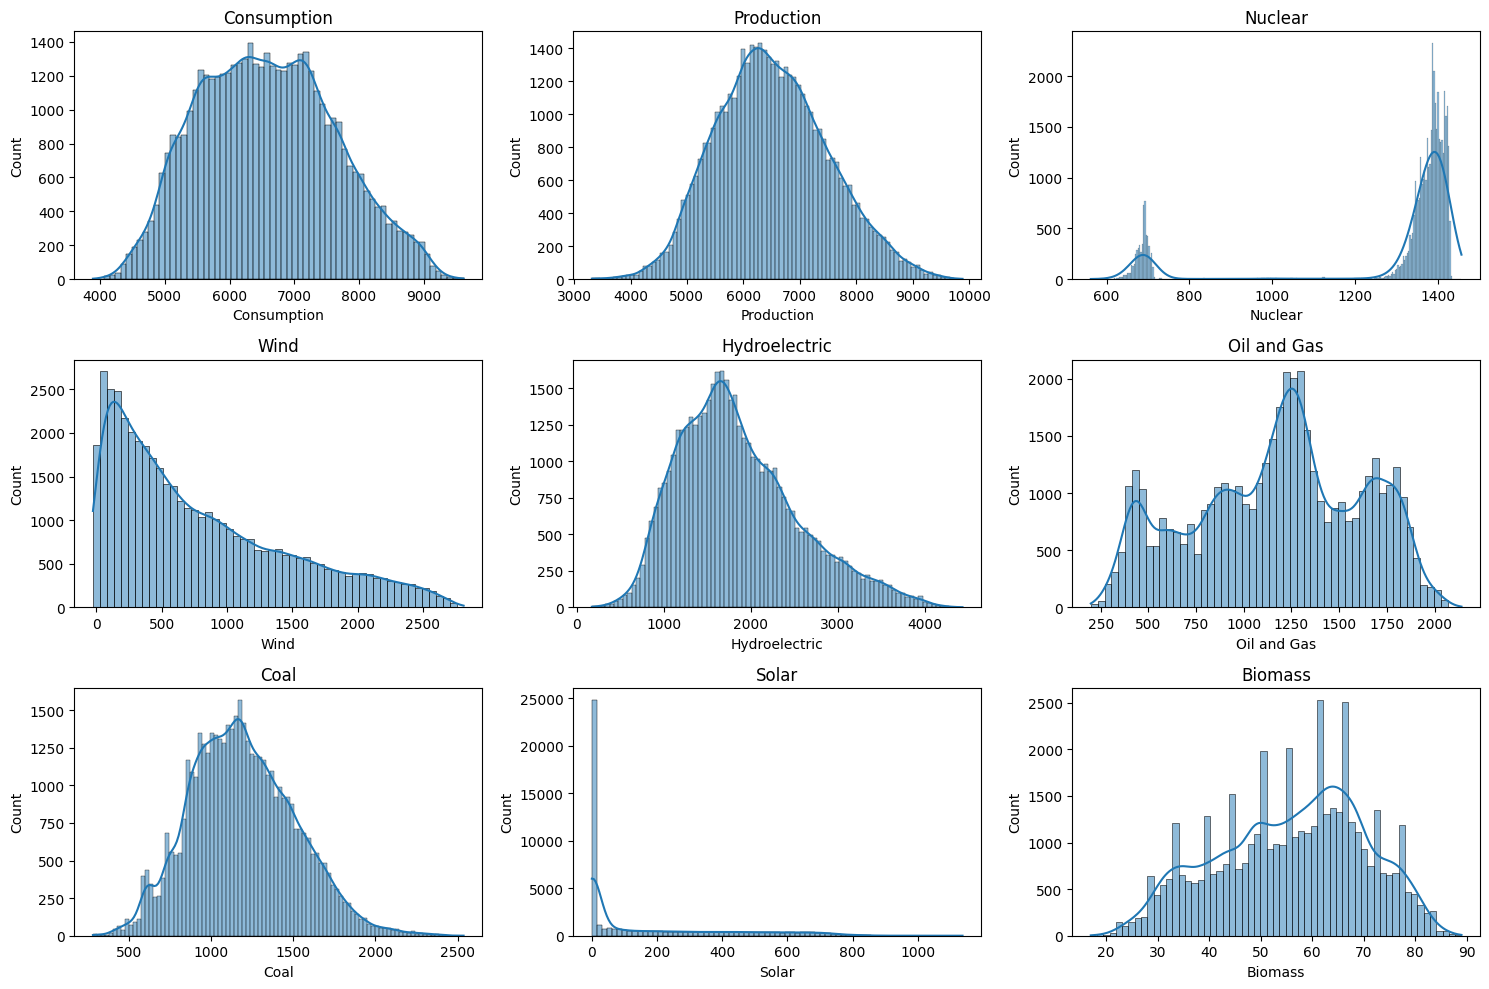

In [67]:
# Crear una figura y una cuadrícula de subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()
# Iterar sobre las columnas y los ejes para dibujar cada gráfico
for i, ax in enumerate(axes):
    if i < len(col_num):
        sns.histplot(data=df_new, x=col_num[i], ax=ax,kde=True)
        ax.set_title(col_num[i],fontsize=12)
    else:
        ax.set_visible(False)  # Ocultar los ejes no utilizados
# Ajustar el layout para evitar superposiciones
plt.tight_layout()
# Mostrar la figura
plt.show()

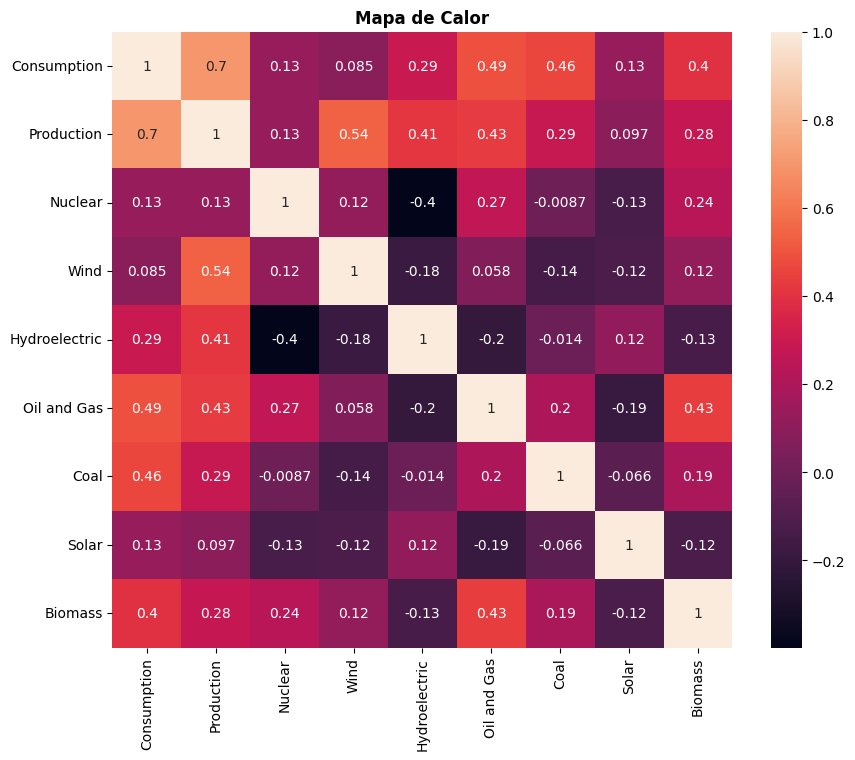

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(df[col_num].corr(),annot=True)
plt.title('Mapa de Calor',fontsize=12,weight='bold')
plt.show()

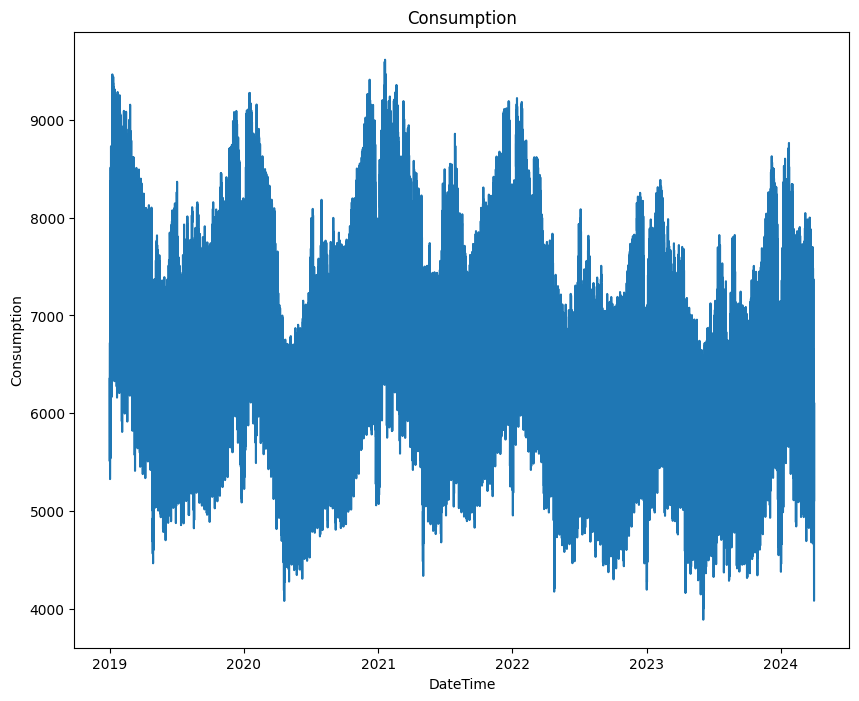

In [71]:
# Analizar Consumption
plt.figure(figsize=(10,8))
sns.lineplot(data=df_new,x=df_new.index,y='Consumption')
plt.title('Consumption')
plt.show()


In [81]:
df_new['month']=df_new.index.month
df_new['week_day'] = df_new.index.day_of_week + 1
df_new['year']=df_new.index.year
df_new['hour_day'] = df_new.index.hour + 1
df_new['day']=df_new.index.day
df_new.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,month,week_day,year,hour_day,day
DateTime,,,,,,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,1,2,2019,1,1
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,1,2,2019,2,1
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,1,2,2019,3,1
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,1,2,2019,4,1
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,1,2,2019,5,1


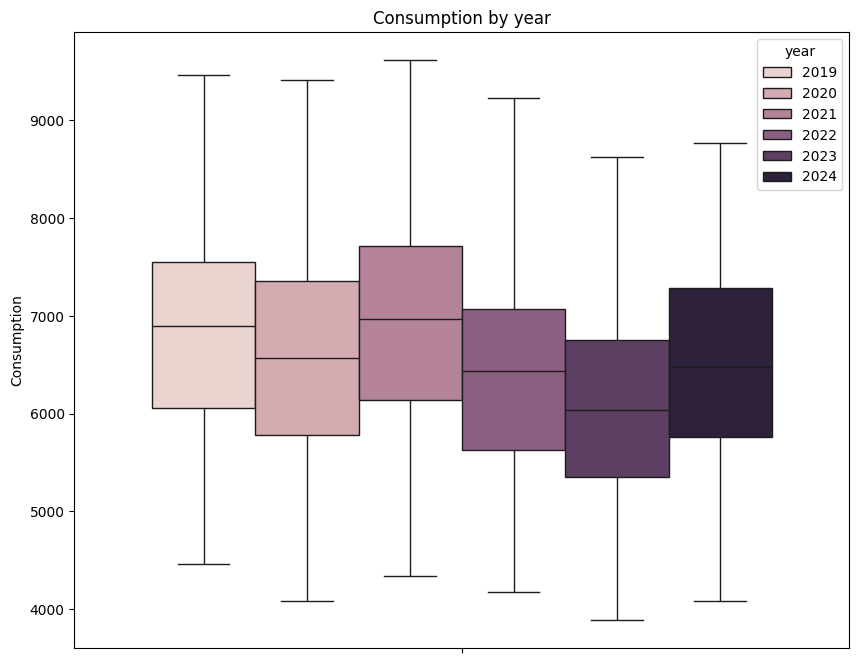

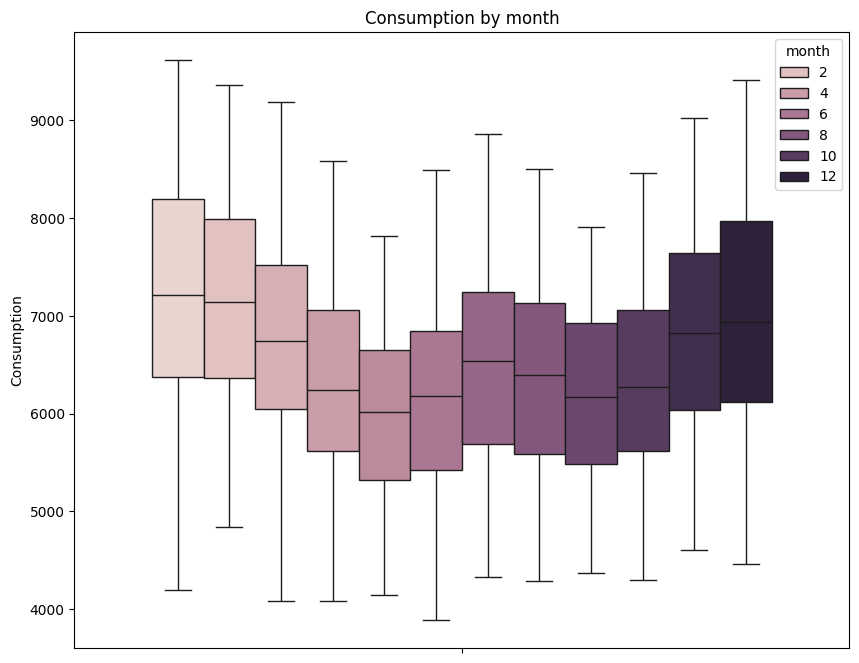

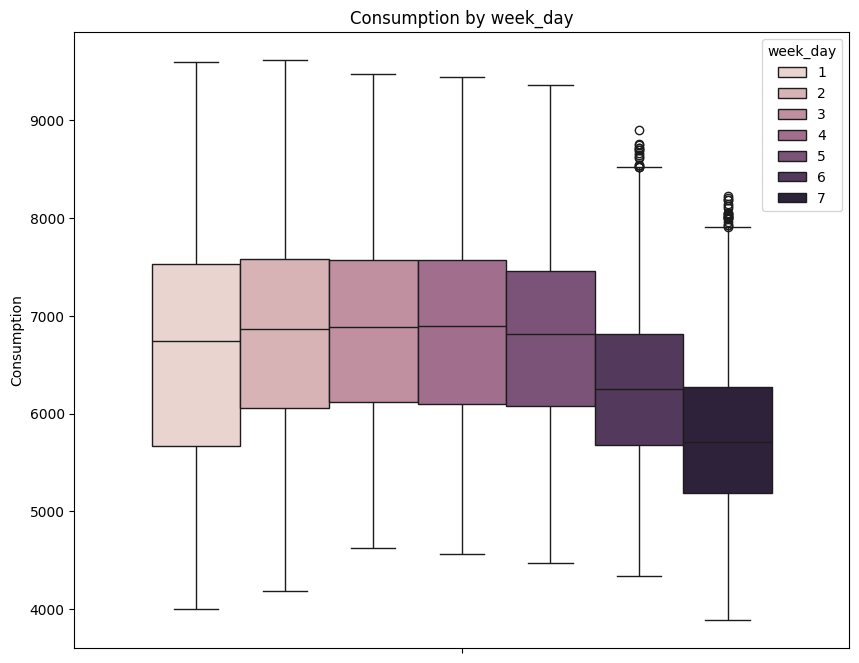

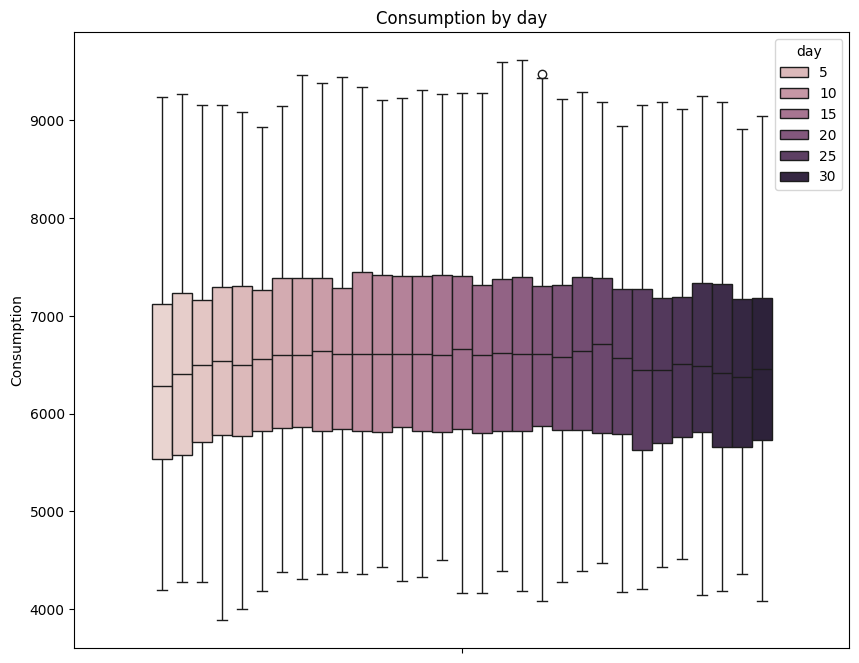

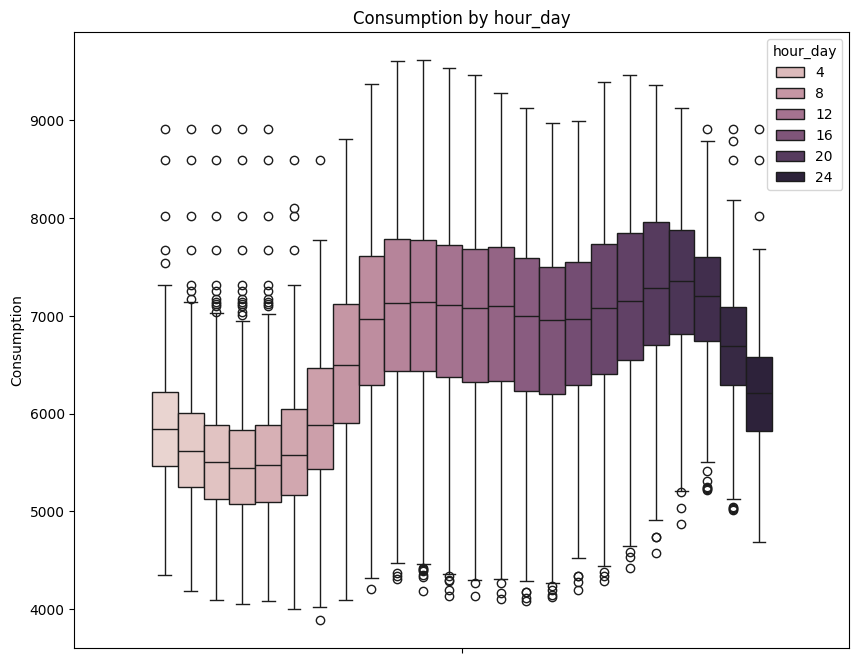

In [82]:
# Consumo de energia por año
plt.figure(figsize=(10,8))
sns.boxplot(data=df_new,y='Consumption',hue='year')
plt.title('Consumption by year',fontsize=12)
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(data=df_new,y='Consumption',hue='month')
plt.title('Consumption by month',fontsize=12)
plt.show()


plt.figure(figsize=(10,8))
sns.boxplot(data=df_new,y='Consumption',hue='week_day')
plt.title('Consumption by week_day',fontsize=12)
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(data=df_new,y='Consumption',hue='day')
plt.title('Consumption by day',fontsize=12)
plt.show()


plt.figure(figsize=(10,8))
sns.boxplot(data=df_new,y='Consumption',hue='hour_day')
plt.title('Consumption by hour_day',fontsize=12)
plt.show()

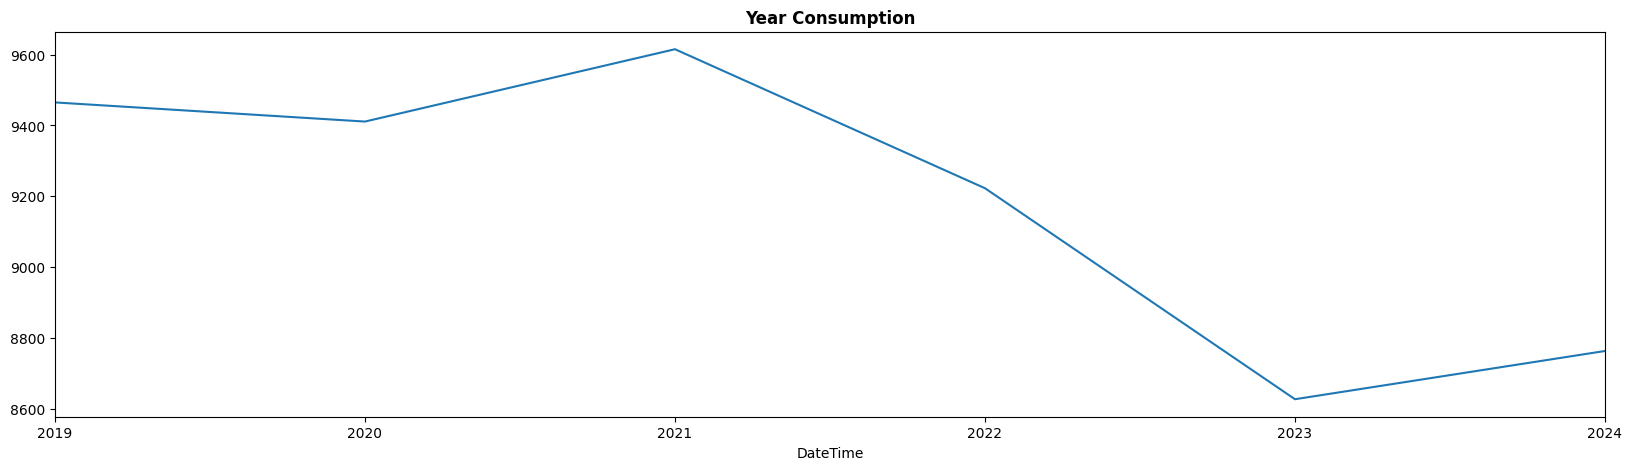

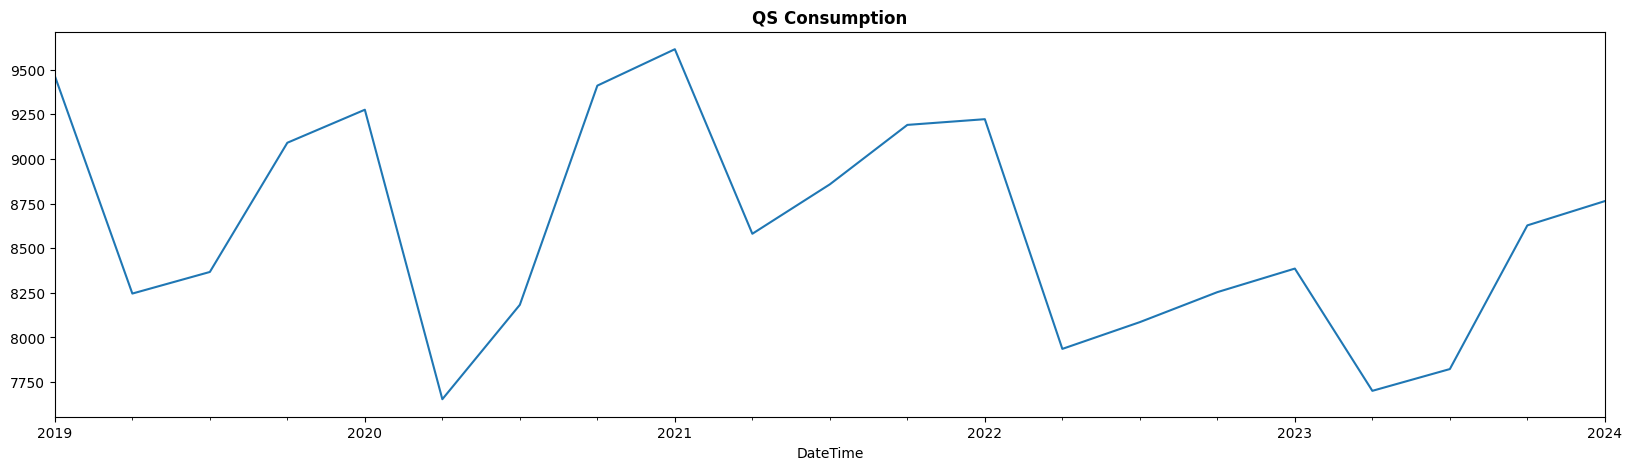

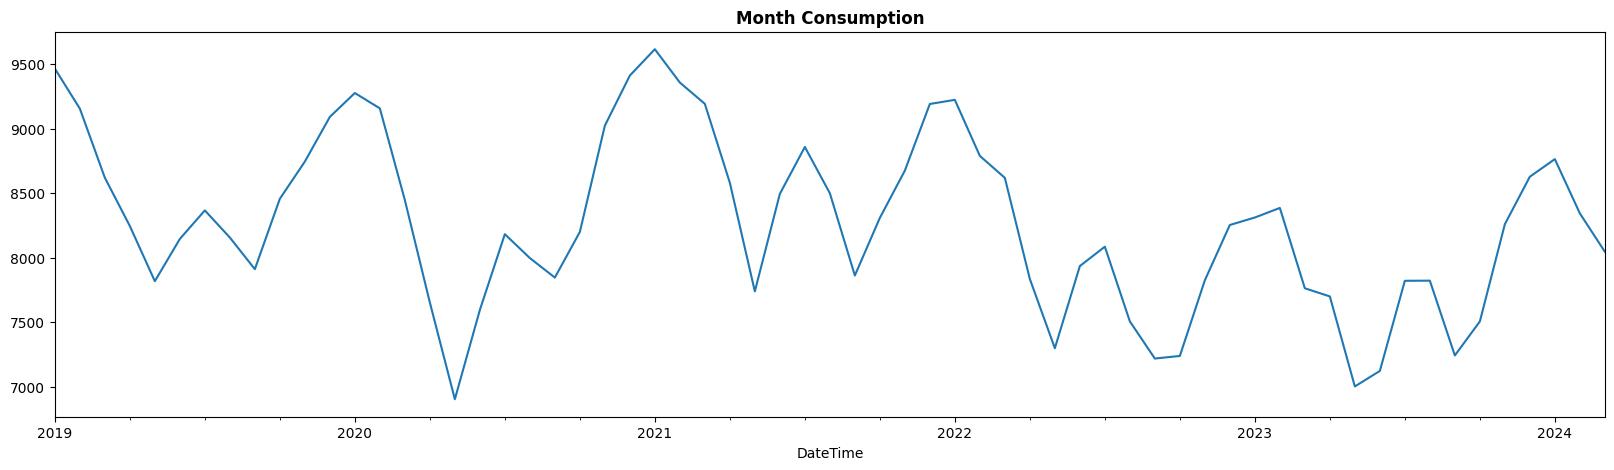

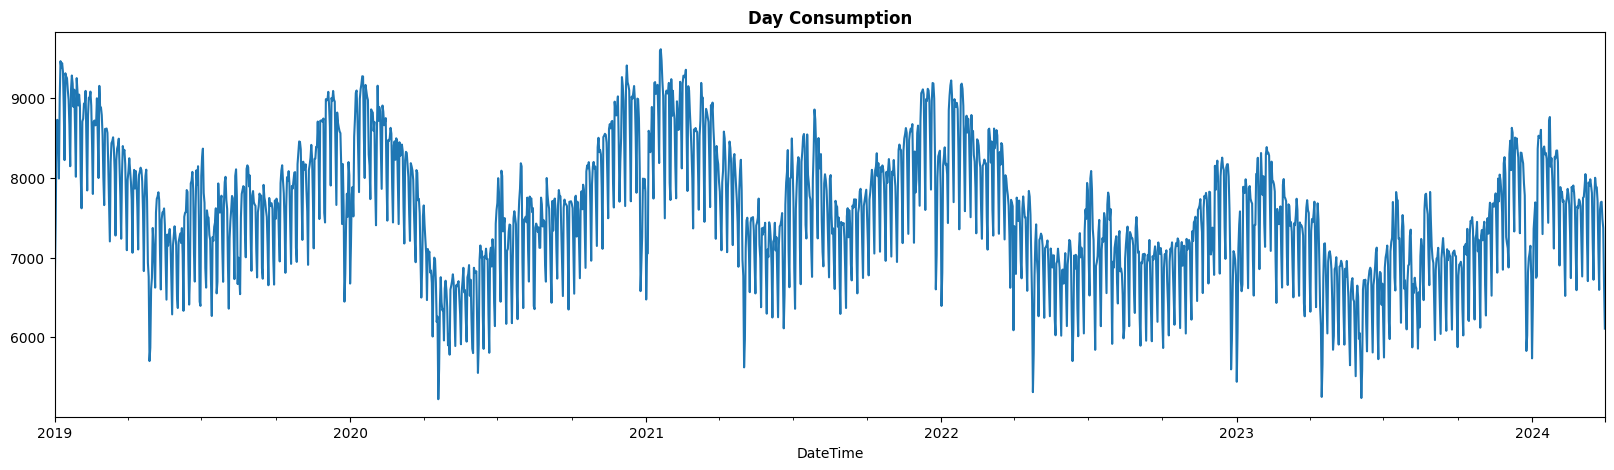

In [87]:
# Year Consumption
df_new.resample(rule='A').max()['Consumption'].plot(figsize=(20,5))
plt.title('Year Consumption',fontsize=12,weight='bold')
plt.show()

# QS Consumption
df_new.resample(rule='QS').max()['Consumption'].plot(figsize=(20,5))
plt.title('QS Consumption',fontsize=12,weight='bold')
plt.show()

# Month Consumption
df_new.resample(rule='M').max()['Consumption'].plot(figsize=(20,5))
plt.title('Month Consumption',fontsize=12,weight='bold')
plt.show()


# Day Consumption
df_new.resample(rule='D').max()['Consumption'].plot(figsize=(20,5))
plt.title('Day Consumption',fontsize=12,weight='bold')
plt.show()

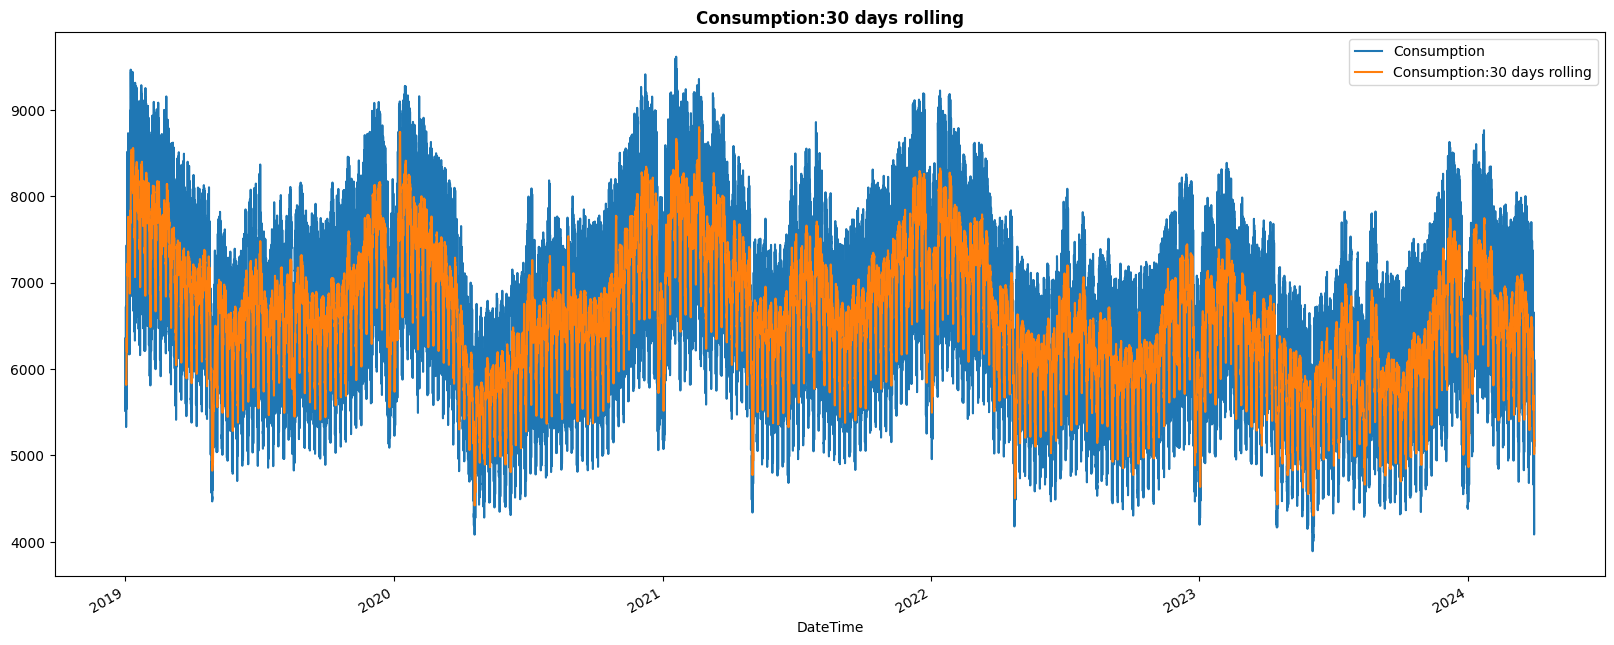

In [95]:
df_30rowlling=df_new[['Consumption']]
df_30rowlling['Consumption:30 days rolling']=df_30rowlling['Consumption'].rolling(30).mean()
df_30rowlling[['Consumption','Consumption:30 days rolling']].plot(figsize=(20,8))
plt.title('Consumption:30 days rolling',fontsize=12,weight='bold')
plt.show()

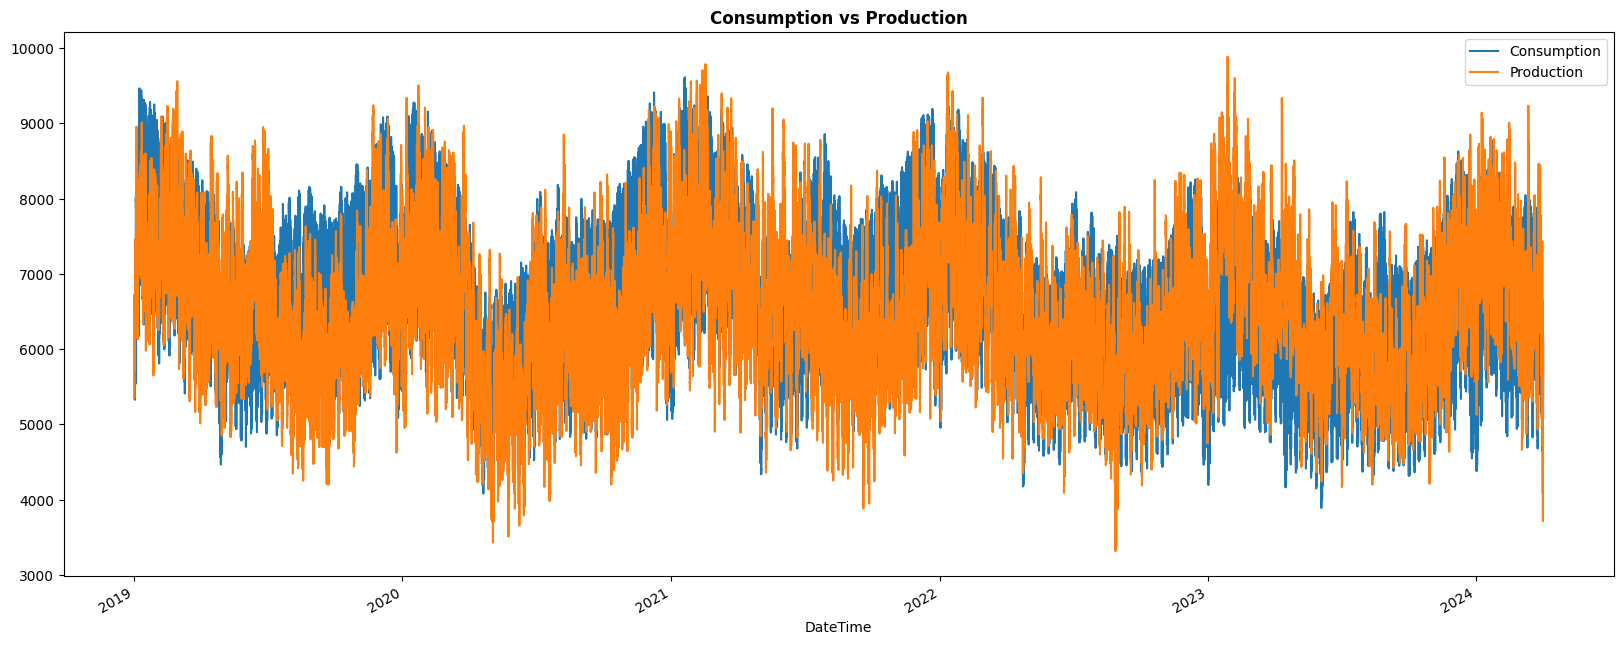

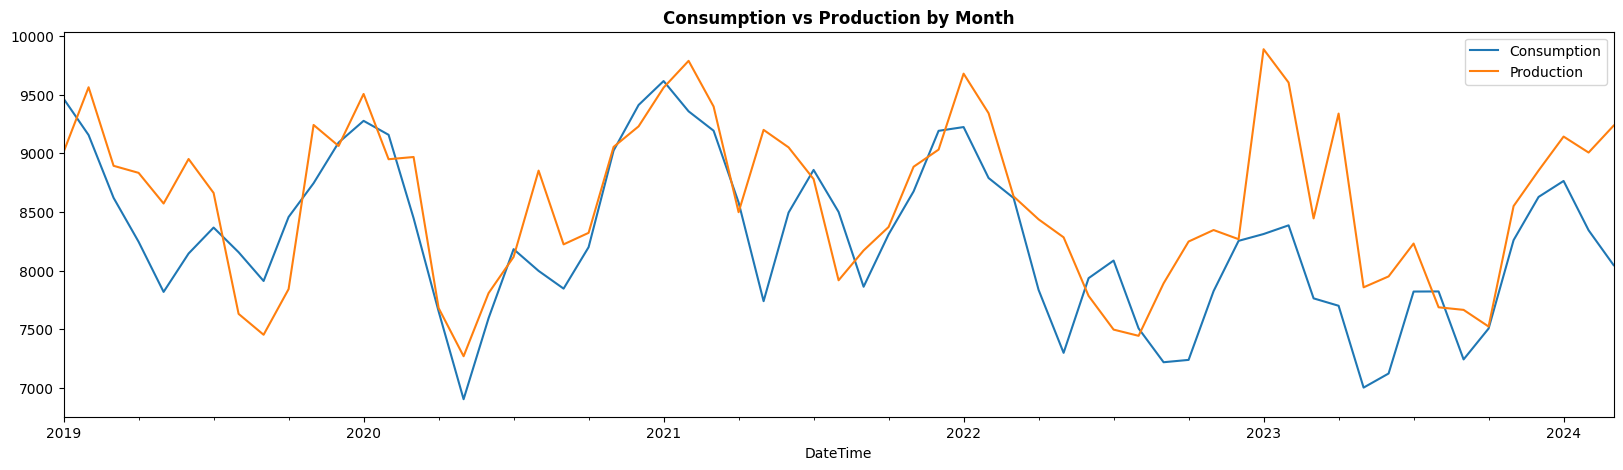

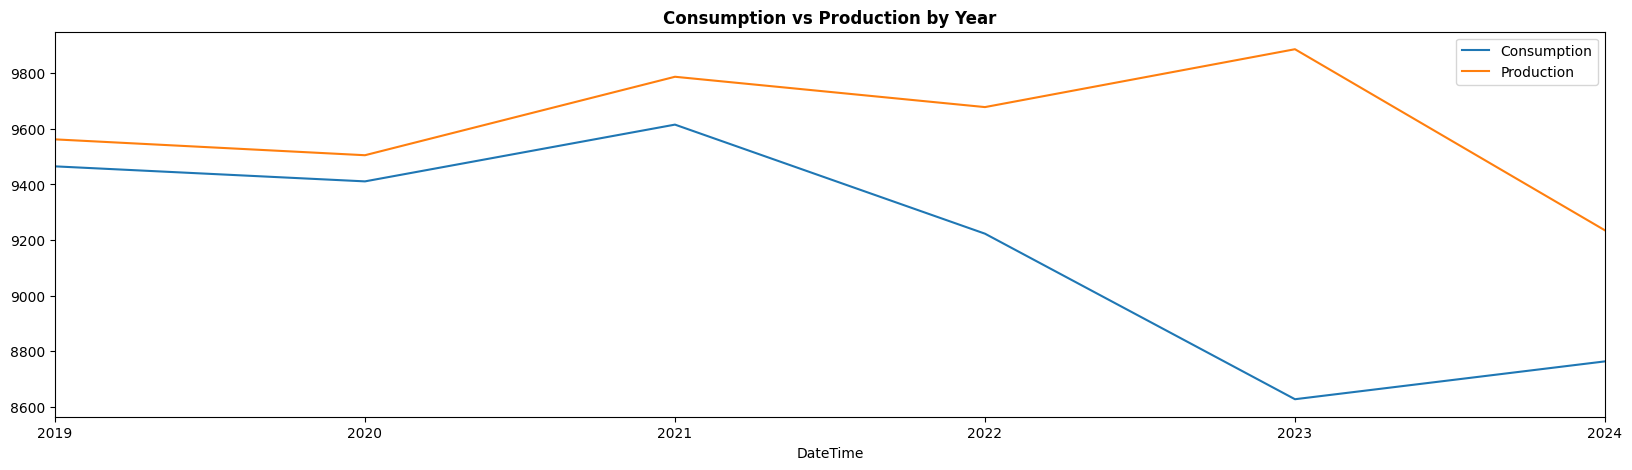

In [100]:
df_new[['Consumption','Production']].plot(figsize=(20,8))
plt.title('Consumption vs Production',fontsize=12,weight='bold')
plt.show()


df_new.resample(rule='M').max()[['Consumption','Production']].plot(figsize=(20,5))
plt.title('Consumption vs Production by Month',fontsize=12,weight='bold')
plt.show()


df_new.resample(rule='A').max()[['Consumption','Production']].plot(figsize=(20,5))
plt.title('Consumption vs Production by Year',fontsize=12,weight='bold')
plt.show()


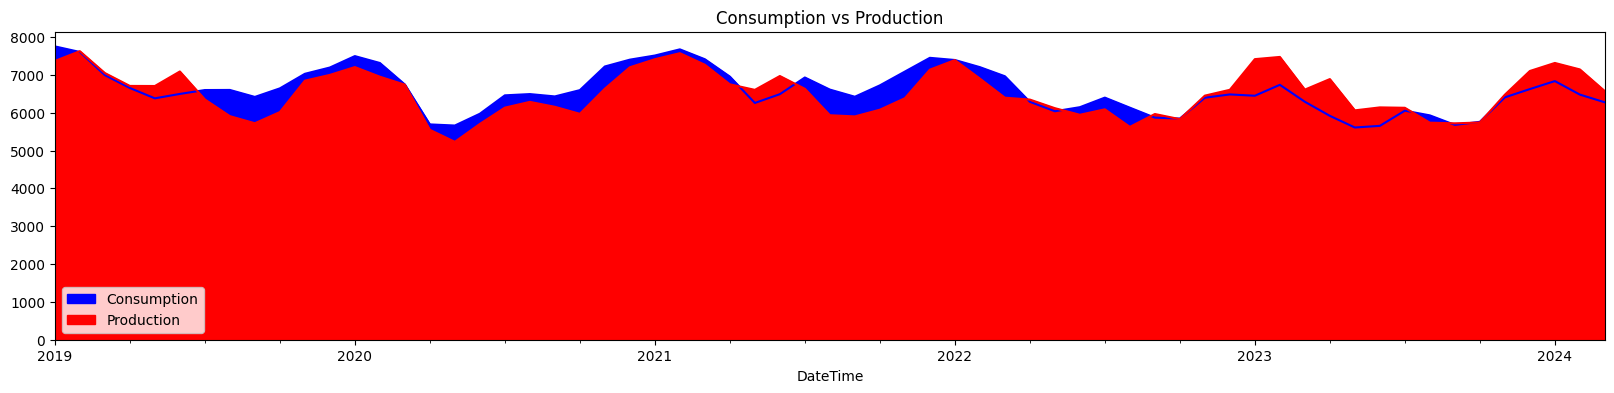

In [105]:
fig, ax = plt.subplots(figsize=(20,4))
df_new.resample('M').mean().plot.area(use_index=True,y='Consumption',color='Blue',ax=ax)
df_new.resample('M').mean().plot.area(use_index=True,y='Production',color='Red',ax=ax,secondary_y = False)
plt.title('Consumption vs Production')
plt.show()

In [110]:
df_new.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,month,week_day,year,hour_day,day
DateTime,,,,,,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,1,2,2019,1,1
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,1,2,2019,2,1
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,1,2,2019,3,1
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,1,2,2019,4,1
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,1,2,2019,5,1


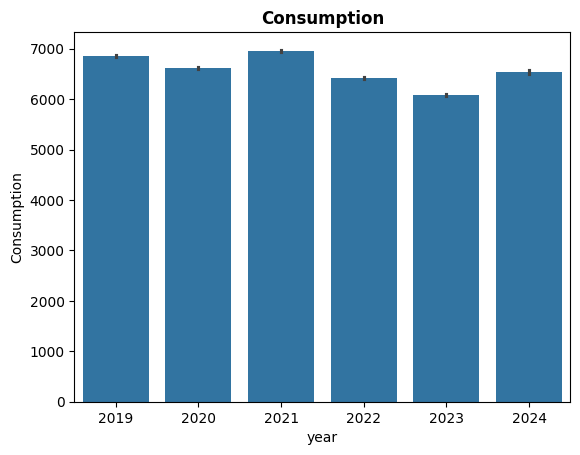

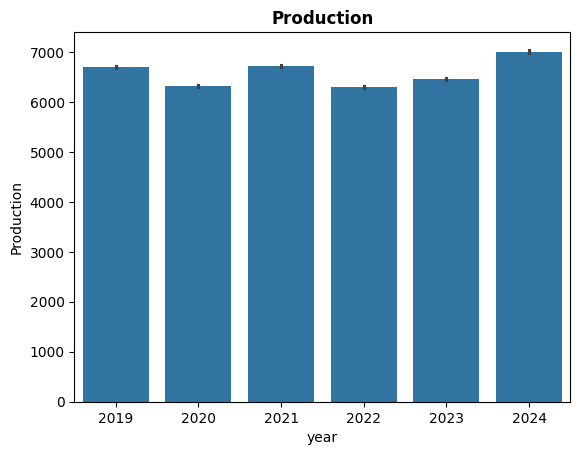

In [117]:
sns.barplot(data=df_new,x=df_new['year'],y=df_new['Consumption'])
plt.title('Consumption',fontsize=12,weight='bold')
plt.show()
sns.barplot(data=df_new,x=df_new['year'],y=df_new['Production'])
plt.title('Production',fontsize=12,weight='bold')
plt.show()

## **Correlation**

In [118]:
from scipy.stats.stats import   pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau


corr_p = df_new[['Consumption', 'Nuclear','Coal', 'Solar']].corr(method='pearson')
print('Pearson correlation matrix')
print(corr_p)
print("\n")
corr_s = df_new[['Consumption', 'Nuclear','Coal', 'Solar']].corr(method='spearman')
print('Spearman correlation matrix')
print(corr_s)

Pearson correlation matrix
             Consumption   Nuclear      Coal     Solar
Consumption     1.000000  0.127617  0.461859  0.126887
Nuclear         0.127617  1.000000 -0.008732 -0.128614
Coal            0.461859 -0.008732  1.000000 -0.066005
Solar           0.126887 -0.128614 -0.066005  1.000000


Spearman correlation matrix
             Consumption   Nuclear      Coal     Solar
Consumption     1.000000  0.010702  0.451529  0.254557
Nuclear         0.010702  1.000000 -0.084438 -0.316097
Coal            0.451529 -0.084438  1.000000 -0.025992
Solar           0.254557 -0.316097 -0.025992  1.000000
